# Introduction to Bayes Models

### Data Science 350
### Stephen Elston

## Introduction

Modern Baysian models are in the class of compuationally intensive models. Bayesian models are a rich class of models, which can provide attractive alternatives to frequentist models. 

![**A Baysian would win this bet**](img/Sun.png)
**A Baysian would win this bet**

## Brief history

A restricted version of Bayes Theorem was proposed by Rev.Thomas Bayes (1702-1761). Bayes Theorem, was published postumously by his friend Richard Price. Bayes' interest was in probabilities of gambling games. He was also a supporter of Isac Newton's new theory of calculus, with his publication, *An Introduction to the Doctrine of Fluxions, and a Defence of the Mathematicians Against the Objections of the Author of The Analyst*.

![](img/ThomasBayes.gif)

A version of Bayes Theorem which in its modern form was published by Pierre-Simon Laplace in Essai philosophique sur les probabilités 1814. Laplace applied Baysian methods to problems in celestial mechanics. These problems had great practical implicatons in the late 18th and early 19th centuries for the safe navigaton of ships. 
 
![](img/Laplace.jpg)

The geophysicist and mathemtician Harold Jefferys extensively used Bayes' methods. His 1939 book, *The Theory of Probability* was in deliberate opposition to Fisher's methods using p-values.

![](img/JeffreysProbability.jpg)


Dispite the philosophical squables, Baysian methods endured and showed an increasing number of success stories. Pragmatists continued to use both approaches. A number of success during the Second World War, with the philosophical battles raging, included:

- Bayesian models were used to improve artillery accuracy in both world wars. In particular the Soviet statistian Kolmagorov used Bayes methods to greatly improve artillery accuracy. 
- Bayesian models were used by Alan Turing to break German codes.
- Bernard Koopman, working for the British Royal Navy, improved the ability to locate U-boats using directional data from intercepted radio transmissions. 


Starting in the second half of the 20th century the convergance of greater computing power and general acceptance lead to the following notable advances in computational Baysian methods.

- Statistical sampling using Monte Carlo methods; stanislaw ulam, John von Neuman; 1946, 1947
- MCMC, or Markov Chain Monte Carlo; Metropolis et al. (1953) Journal of Chemical Physics
- Hastings (1970), Monte Carlo sampling methods using Markov chains and their application
- Geman and Geman (1984) Stochastic relaxation, Gibbs distributions and the Bayesian restoration of images
- Duane, Kennedy, Pendleton, and Roweth (1987),  Hamiltonian MCMC
- Gelfand and Smith (1990), Sampling-based approaches to calculating marginal densities.



## Baysian vs. Frequentist Views

The battle between Fisher, Jefferys and their protégés continued for most of the 20th century. This battle was bitter and often personal. The core of these argument were:

- Fisher argued that the selection of a Bayesian prior distribution was purely subjective, allowing one to achieve any answer desired.
- Jefferys argued that all knowledge is in fact subjective, and that choosing a confidence interval was subjective in any event.

With greater compuational power and general acceptance, Bayes methods are now widely used in areas ranging from medical research to natural language understanding to web search. Amoung pragmatists, the common belief today is that some problems are better handled by Frequentist methods and some with Bayesian methods.

Let's summarize the differences between the Baysian and Frequentist views. 

- Bayesian methods use priors to quantify what we know about parameters.
- Frequentists do not quantify anything about the parameters, using p-values and confidence intervals to express the unknowns about parameters.

Recalling that both views are useful, we can contrast these methods with a chart.

![](img/FrequentistBayes.jpg)

## References

### Some introductory texts

These two books provide a broad and readable introduction to Baysian data analysis, well, sort of. Both books contain extensive examples using R and specialized Bayes packages.

![](img/StatisticalRethinking.jpg)

![](img/DoingBaysianDataAnalysis.jpg)

### Modeling reference

This book contains a comprehensive treatment of applying Baysian models. The level of treatments in intermediate. The examples are from the social sciences, but the methods can be applied more widely. The examples use R and specialized Bayes packages. 

![](img/BayesRegression.jpg)

### Theory 

This book contains a comprehensive overview of the modern theory of Bayesian models. The book is at an advanced level. Only theory is addressed, which only very limited R code examples.  

![](img/BaysianDataAnalysis.jpg)

## Bayes Theorm

Let's go through a simple derivation of Baye's theorm. Remember the rule for conditional probability:

$$P(A|B) = \frac{P(A \cap B}{p(B)}\\
And\\
P(B|A) = \frac{P(A \cap B)}{p(A)}$$

Eliminating $P(A \cap B):$

$$ P(B)P(A|B) = P(A)P(B|A) \\
Or\\
P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$

Which is Bayes' Theorm!

### Example, medical test

Let's work out the conditional probabilities for a medical test which has an accurcy of 99% for a very rare disease with a probability of occurance of 0.0003125. We can work out the contitonal probability tree as shown below.

![](img/Medical.jpg)

Let's apply Bayes Theorm to this problem. What we want to know is the chance someone actually has the disease given a positve test.

$$ P(A|B) = \frac{P(A)P(B|A)}{P(B)} \\
P(Disease|Test+) = P(Test+|Disease) \frac{P(Disease)}{P(Test+)}$$

**Your Turn:** Compute the conditional probability of having the disease given a positive test. Hint, the probability of a positive test is the sum of the probability of a positive test given the disease and the probability of an erronious test given no disease. 

In [1]:
.99 * 0.0003125 /(.99 * 0.0003125 + .01 * (1 - 0.0003125))

[1] 0.03001819

### Example, probabilities of eye and hair color

A sample population has the following probabilities of eye and hair color combinations.

In [2]:
eyeHair = data.frame(Black = c(0.11, 0.03, 0.03, 0.01), 
                     Brunette = c(0.2, 0.14, 0.09, 0.05),
                     Red = c(0.04, 0.03, 0.02, 0.02),
                     Blond = c(0.01, 0.16, 0.02, 0.03))
row.names(eyeHair) = c('Brown', 'Blue', 'Hazel', 'Green')
eyeHair

,Black,Brunette,Red,Blond
Brown,0.11,0.20,0.04,0.01
Blue,0.03,0.14,0.03,0.16
Hazel,0.03,0.09,0.02,0.02
Green,0.01,0.05,0.02,0.03


The figure in the table above are the conditmional probabilities. Note that in the case $P(hair|eye) = P(eye|hair)$. 

Given these probabilities joint probabilities, it is easy to compute the marginal probabilities by summing the probabilities in the rows and columns. The **Marginal probability** is the probability of along one variable (one margin) of the distribution. For example, $P(Red)$ or $P(Green)$.

In [3]:
## Compute the marginal distribution of hair color and eye color
eyeHair = rbind(eyeHair, apply(eyeHair, 2, sum))
eyeHair$Marginal_eye = apply(eyeHair, 1, sum)
row.names(eyeHair) = c('Brown', 'Blue', 'Hazel', 'Green', 'Marginal_hair')
eyeHair

,Black,Brunette,Red,Blond,Marginal_eye
Brown,0.11,0.20,0.04,0.01,0.36
Blue,0.03,0.14,0.03,0.16,0.36
Hazel,0.03,0.09,0.02,0.02,0.16
Green,0.01,0.05,0.02,0.03,0.11
Marginal_hair,0.18,0.48,0.11,0.22,0.99


**Your Turn:** Use Bayes Theorm to compute the probability of each eye color given that the subject has blue eyes; $P(Hair\ Color|Blue\ Eyes)$. Hint, this is a bit tricky since $P(hair\ color) = 1$ across all colors. 

In [4]:
eyeHair['Blue', ] / eyeHair['Blue', 'Marginal_eye']

,Black,Brunette,Red,Blond,Marginal_eye
Blue,0.08333333,0.3888889,0.08333333,0.4444444,1


## Applying Bayes Theorm

We need a formulation of Bayes Theorm which is convienient to use for compuational problems. Specifically, we don't want to be stuck summing all of the possiblilites to compute $P(B)$. 

Look at some fun facts about conditional probabilities. 

$$
𝑃(𝐵 \cap A) = 𝑃(𝐵│𝐴)𝑃(𝐴) \\
And \\
𝑃(𝐵)=𝑃(𝐵 \cap 𝐴)+𝑃(𝐵 \cap \bar{𝐴}) \\
Then \\
𝑃(𝐵)=𝑃(𝐵│𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴}) \\
where \\
\bar{A} = Not\ A
$$

We can now rewrite Bayes Theorm:

$$ P(A|B) = \frac{P(A)P(B|A)}{𝑃(𝐵│𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴})} \\ $$

This is a bit of a mess. But fortunately, we don't always need the denominator, in which case we are just look at the un-normalized distribution:

$$𝑃(𝐴│𝐵)=𝑘∙𝑃(𝐵|𝐴)𝑃(𝐴)$$

Ignoring the normalizaton constant $k$, we get:

$$𝑃(𝐴│𝐵) \propto 𝑃(𝐵|𝐴)𝑃(𝐴)$$

### Applying the simplifed relationship Bayes Theorm

How to we interpret the relationships shown above? We do this as follows:

$$Posterior\ Distribution \propto Likelihood \bullet Prior\ Distribution \\
Or\\
𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠│𝑑𝑎𝑡𝑎) \propto 𝑃(𝑑𝑎𝑡𝑎|𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠)𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠) $$

These relationships apply to data distributions or to parameters in a model (partial slopes, intercept, error distributions, lasso constant,…) and the observed data. 

### Creating Bayes models

Given prior assumption about the behavior of the parameters (the prior), produce a model which tells us the probability of observing our data, to compute new probability of our parameters. Given this, the steps for working with a 

- Identify data relevant to the research question. E.g.: what are the measurement scales of the data?
- Define a descriptive model for the data. For example, pick a linear model formula.
- Specify a prior distribution of the parameters. For example, we think the error in the linear model is Normally distributed as $N(\theta,\sigma^2)$.
- Use the Bayesian inference formula (above) to re-assess parameter probabilities.
- Update if more data is observed. This is key! The posterior of a Baysian model naturally updates as more data is added, a form of learning.


### How do we choose a prior?

The choice of the prior is a serious problem when performing Bayesian analysis.In general, a prior must be convincing to a **sceptical audience**. Some possible approches include:

- Prior observations
- Domain knowledge
- If poor knowledge use less informative prior
- **Watch out:** A uniform prior is informative. For exampe, you must set the limits on range of values
 
One analytically and compuationally simple choice is a **conjugate prior**. When a likelihood is multiplied by a conjugate prior the distribution of the postirior is the same as the likelihood. Most named distributions have conjugates. A few commonly used eamples are shown in the table below:

Likelihood | Conjugate
---|---
Binomial|Beta
Bernoulli|Beta
Poisson|Gamma
Categorical|Dirichlet
Normal| Normal, Inverse Gama



## A First Example

With a bit of theory in mind, let's pull things together with an example. In this example we consider the occurance of rain. The data are binomially distributed, it either rains on a day or it does not. In the example we will:

- Select a prior
- Using data compute the likelihood and posterior distributions. 
- Add more data to our data set to updated the posterior distribution.

The posterior distribution in binomially distributed. We can write this formally for $k$ successes in $N$ trials:

$$ P(A) = \binom{N}{k} \cdot p^kq^{N-k}$$

Our prior should then be the probability distribution of $p$.

### Choosing a prior

Our first step in this analysis is to choose a prior distribution. Since our likelihood distribution is binomial, we will start with the conjugate Beta distribution. Formally, we can write the Beta distribution:

$$Beta(p |a, b) = \kappa x^{a-1}(1 - x)^{b-1} \\
where,\ \kappa = normalization\ constant$$

The Beta distribution is define on the interval $0 \le Beta(p|a,b) \le 1$. The Beta distribution has two parameters, a and b, which determine the shape. To get a feel for the Beta distribution, exectute the code in the cell below which computes 100 examples on a 10x10 grid. 

NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL
NULL,NULL,NULL,NULL,NULL


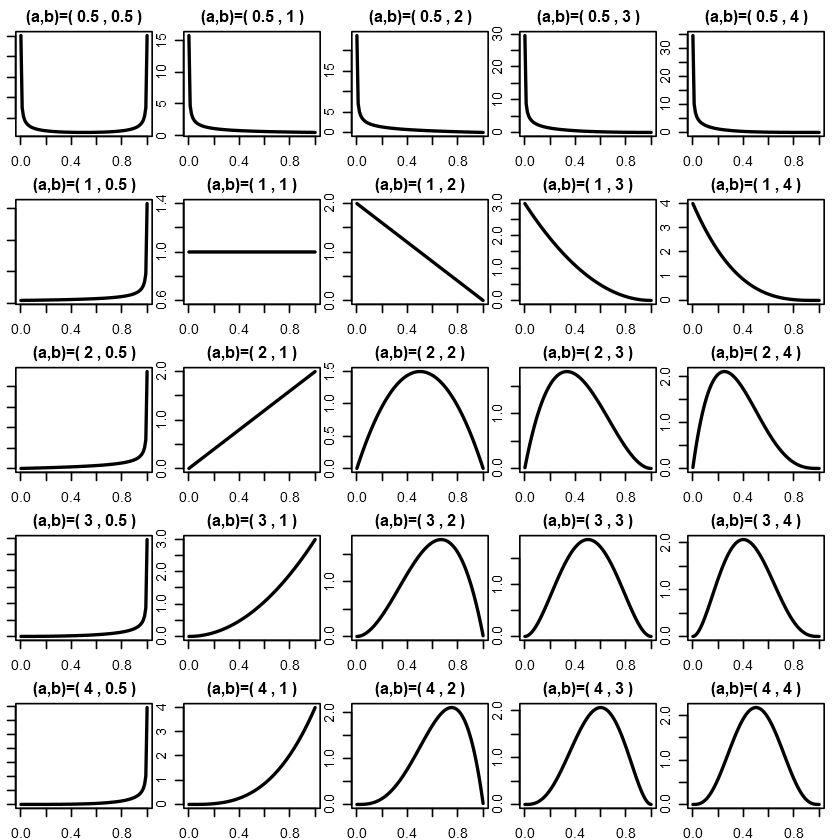

In [5]:
alpha = c(0.5,1,2,3,4)
beta = alpha
x = seq(0.001,0.999,length=100)

par(mfrow = c(5,5), mar=c(2,1,2,1)) # mar = c(bottom, left, top, right)
sapply(alpha, function(a){
  sapply(beta, function(b){
    plot_title = paste("(a,b)=(",a,",",b,")")
    plot(x,dbeta(x,a,b),xlab="",ylab="",
         main=plot_title, type="l", lwd=2)
  })
})

# Set plot options back to normal
par(mar=c(5.1,4.1,4.1,2.1), mfrow=c(1,1))

You can see from the plots above, that the Beta distribution can take on quite a range of shapes, depending on the parameters. Generally if $a \gt b$ the distribution skews to the rights, if $a \lt b$ to the left, and symetric if $ a = b$.

Let's say that we think the change of rain on any given day is 0.2, and that the probability at the 75% point is 0.28. We can compute a beta distribution for this prior using the `beta.select` function. Execute this code and examine the result. 

In [6]:
library(LearnBayes)
## I think the chance of rain is 0.2 with
## with a probability at the 75% point of 0.28
## Compute my Beta prior
beta.par <- beta.select(list(p=0.5, x=0.2), list(p=0.75, x=.28))
beta.par ## The parameters of my Beta distribution

[1]  2.95 10.82

You can see the values of a and b which have been computed above. 

### Computing the posterior distribution

At this point our model is just our prior distribution. If we want to estimate the chance of rain for the next two days, we just draw samples from this prior. In other words, without data, our posterior is just our prior.

Run the code to see the relationship between the prior an posterior distributions in the absence of data. The `c(0,0)` indicates we have zero successes and zero failures; no data.

Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.3.3"

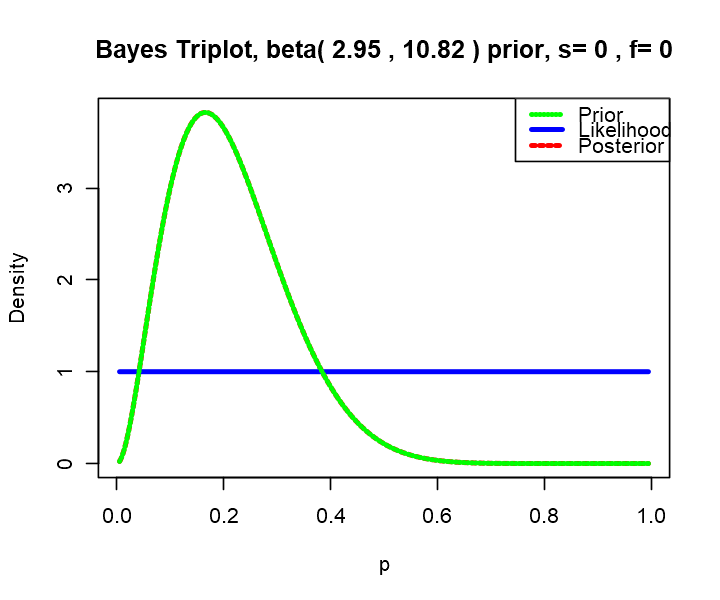

In [7]:
require(repr)
options(repr.plot.width=6, repr.plot.height=5)
triplot(beta.par, c(0, 0))

We know which likelihood we will use with our prior distributions. Once we have some data we can update the posterior distribution. 

Let's say we observe 6 days of rain in the next 10. Update the model and observe the results by running the code in the cell below.

[1]  8.95 14.82

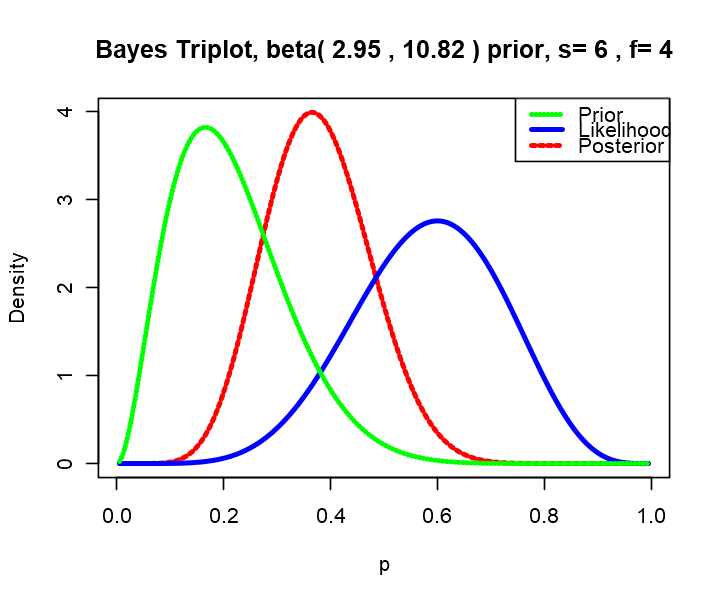

In [8]:
beta.par + c(6, 4)
triplot(beta.par, c(6, 4))

The triple plot shows the distribution of the prior, the likelihood and the posterior. Notice that with addition of data the posterior is now between the prior and the likelihoood. 

If we observer the weather for another 10 days we see 5 days of rain. Run the code in the cell below to see how this additional data affects the posterior distribution.

[1] 13.95 19.82

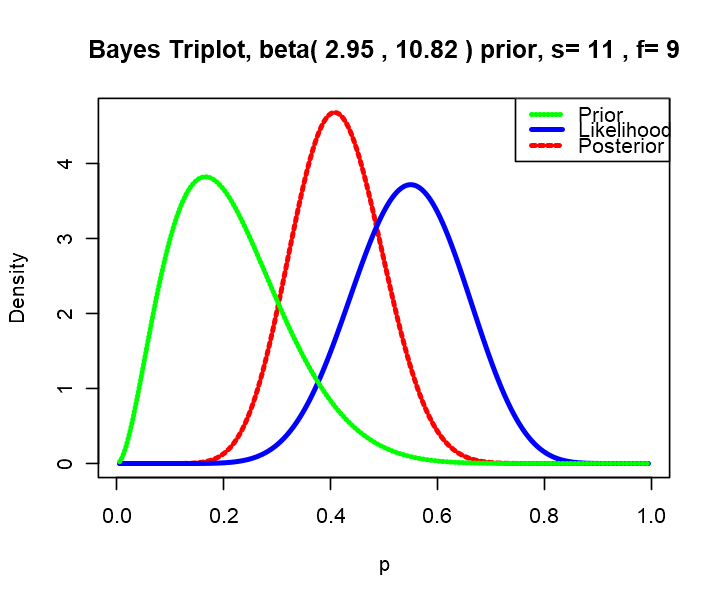

In [9]:
beta.par + c(11, 9)
triplot(beta.par, c(11, 9))

The posterior has moved closer to the likelihood once again. 

In another 20 days we observe 14 days with rain. Using this new data run the code in the cell below to update the model.

[1] 27.95 25.82

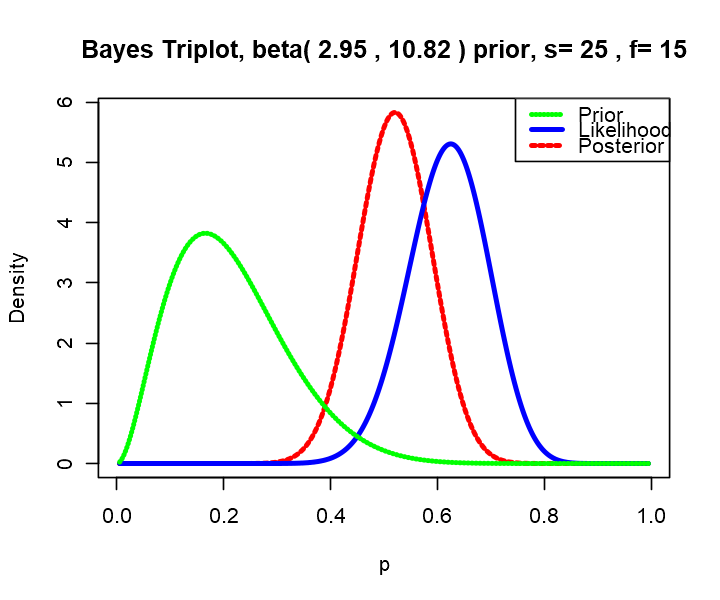

In [10]:
beta.par + c(25, 15)
triplot(beta.par, c(25, 15))

As you might expect by now, adding more obervations to the model, moves the posterior closser to the likelihood. 

In fact, as data is added to a Bayesian model, the posterior moves toward the likelihood. This property has two important implications:

- The prior matters less as more data is added to a Baysian model.
- The inferences from Baysian and frequentist models tend to converge as data set sizes grow.

**But, be careful!** With large scale problems with large numbers of parameters you may need enourmous data sets to see the convergance in behavior. 

**Your Turn:** You arrive in distance city knowning nothing about the weather. You want to build a model to predict the likelihood of rain. Create a Bayesian model of the chance of rain by doing the following.

- Since you know nothing about this city, choose an uninformative $Beta(1,1)$ distribution as you prior. 
- As before use a binomial likelihood
- In your first 20 days in this city there are 2 rain days. Using this data compute your Baysian model and make the triplot. What does this tell you about the posterior distribution of the chances of rain?

**Use new names for your variables!** If you do not, you will break the rest of this notebook.

[1] 1 1

[1]  3 19

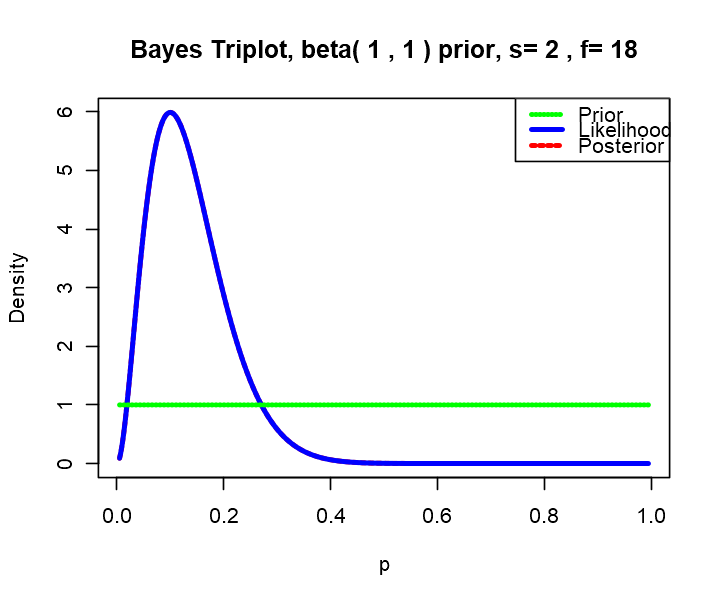

In [11]:
beta.new <- beta.select(list(p=0.5, x=0.5), list(p=0.75, x=.75))
beta.new ## The parameters of my Beta distribution
beta.new + c(2, 18)
triplot(beta.new, c(2, 18))

## Simulation from the posterior distribution

Once we have a posterior distribution we can simulate from this distribution for number of reasons. The simulation consists of taking a number of random draws from the posterior distribution. There are a number of reasons why you might want to simulate from the posterior distribution.

- Compute credible or highest density intervals of the model parameters.
- Test the model against the data.
- Compute forecasts from the model.

### Credible intervals

A **credible interval** is an interval on the Baysian posterior distribution. The credible interval is sometime called the highest density interval (HDI), or highest posterior density interval. As an exxample, the 90% credible interval encompases the 90% of the posterior distribution with the highest probability desnsity.  

The credible interval is the Baysian analog of the frequentist confidence interval. However, these two measures are conceptually different. The confidence interval is chosen on the distribution of a test statistic, whereas the credible interval is computed on the posterior distribution. For symetric distributions, for say loction parameters, the credible interval can be numerically the same as the confidence interval. However, in the general case, these two quantities can be quite different.

The code in the cell below, plots the posterior distribution of the parameter of the binomial distribution parameter $p$. The 90% credible interval, or HDI, is also computed and displayed. Execute this code and examine the result.

5%       95% 
0.4099585 0.6320687

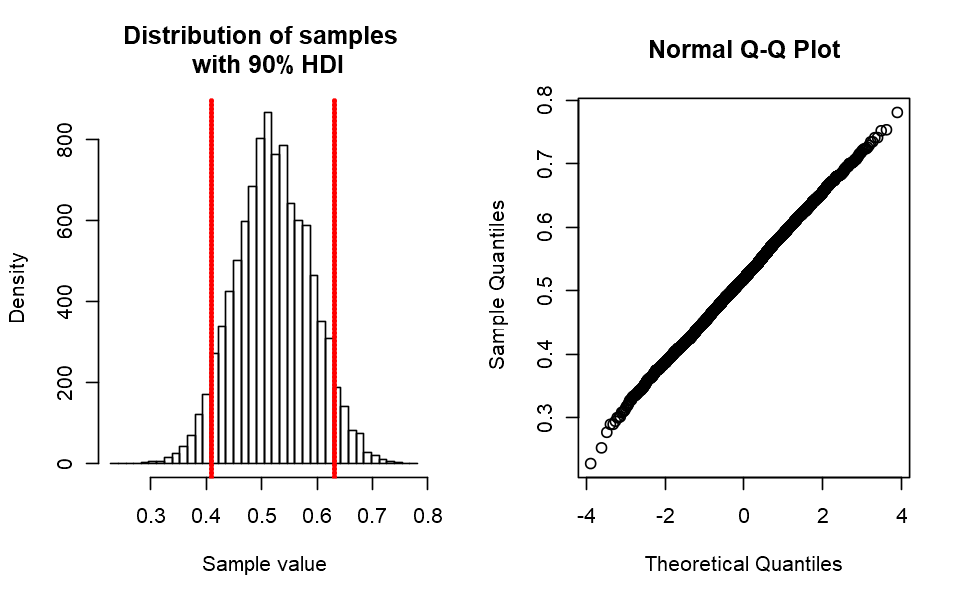

In [12]:
# Simulate from the posterior and 
## compute confidence intervals
options(repr.plot.width=8, repr.plot.height=5)
beta.post.par <- beta.par + c(25, 15)
post.sample <- rbeta(10000, beta.post.par[1], beta.post.par[2])
par(mfrow = c(1,2))
quants = quantile(post.sample, c(0.05, 0.95))
breaks = seq(min(post.sample), max(post.sample), length.out = 41)
hist(post.sample, breaks = breaks, 
     main = 'Distribution of samples \n with 90% HDI',
     xlab = 'Sample value',
     ylab = 'Density')
abline(v = quants[1], lty = 3, col = 'red', lwd = 3)
abline(v = quants[2], lty = 3, col = 'red', lwd = 3)
qqnorm(post.sample)
par(mfrow = c(1,1))
quants

### Testing the model

There are a number of ways to test a Baysian model by simulating from the posterior distribution. Data values computed from the simulated parameter values should resemble the data used to build the model. 

First, let's try a simpler test. We simply plot the maximum likelihood (frequentist) value of the parmeter $p$ on the distribution simulated from the posterior. This value, should lie well within the simulaated distribution. Run the code in the cell below and examine the result.

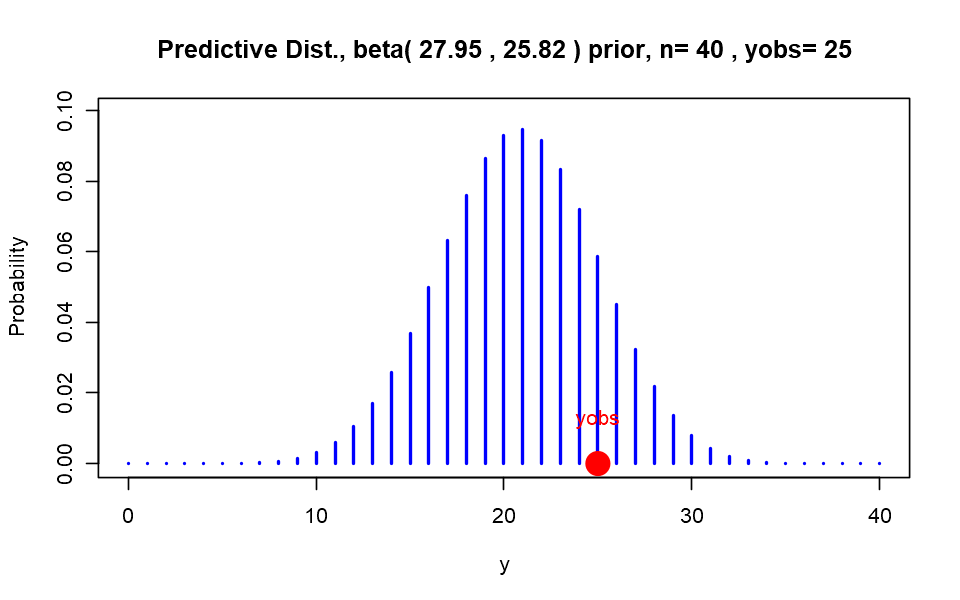

In [13]:
## Check on the model
predplot(beta.post.par, 40, 25)

The maximum likelihood value of $p$ is near the center of the simulated values, so we are statisfied with the results of this test.

### Forecasting

We can forecast or predict likely future values of the data generating process, by computing values from parameter values simulated from the posterior distribution. Let's say we want to know the distribution of rainy days in the next 60 days. We can compute this distribution by simulating from the posterior, as in the code shown in the cell below. Run this code and examine the result.

$prob
[1] 0.9116206

$set
 [1] 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40

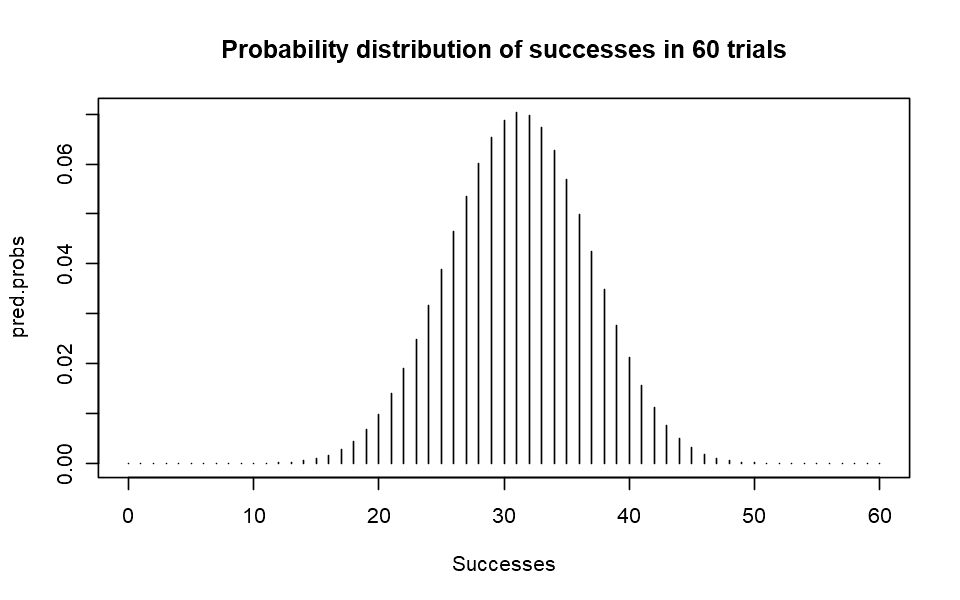

In [14]:
## What is the probability of observing 0-8 successes in the
## next 60 trials?
n <- 60
s <- 0:n
pred.probs <- pbetap(beta.post.par, n, s)
plot(s, pred.probs, type="h", 
     main = paste('Probability distribution of successes in', as.character(n), 'trials'),
     xlab = 'Successes')
discint(cbind(s, pred.probs), 0.90)

**Your Turn:** Use the model you computed in the previous exercise to compute the distribution of rain days you can expect in the next 5 days. 

$prob
[1] 0.966464

$set
[1] 0 1 2

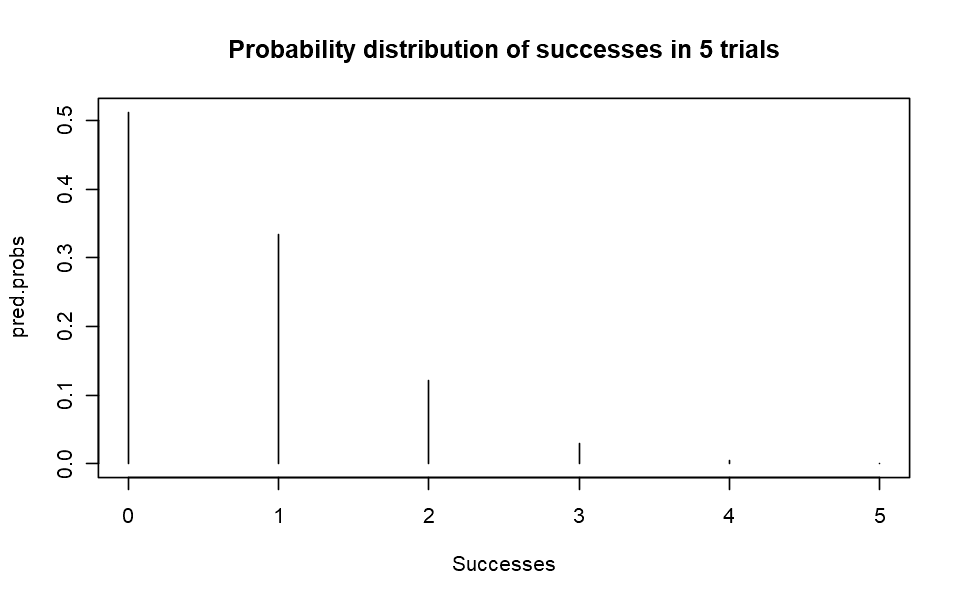

In [15]:
n <- 5
s <- 0:n
pred.probs <- pbetap(beta.new + c(2, 18), n, s)
plot(s, pred.probs, type="h", 
     main = paste('Probability distribution of successes in', as.character(n), 'trials'),
     xlab = 'Successes')
discint(cbind(s, pred.probs), 0.90)

![](img/BayesDeNeon.jpg)

#### Copyright 2017 Stephen F Elston. All rights reserved.